# Лабораторная работа 2 | Крючков А.В М80-407Б-21

## 2.1	Создание бейзлайна и оценка качества (регрссия)

### Импорт необходимых библиотек

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Загрузка и первичный анализ данных

In [97]:
data = pd.read_csv('data/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Предобработка данных

Для работы моделей необходимо выполнить кодирование категориальных признаков, таких как `sex`, `smoker`, и `region`.

In [98]:
# Кодируем категориальные переменные с помощью pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Разделение данных на обучающую и тестовую выборки

Целевой переменной является `charges`, а остальные переменные - предикторами. Делим данные на тренировочную и тестовую части.

In [99]:
# Определяем признаки (X) и целевую переменную (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Создание и обучение модели линейной регрессии на тренировочных данных
model = LinearRegression().fit(X_train, y_train)

Оценка для модели Линейная регрессия:
MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
R²: 0.78
------------------------------


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


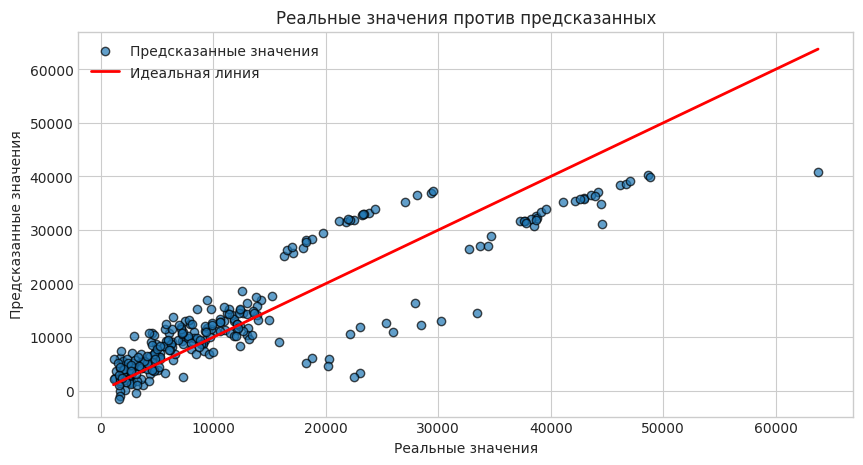

In [101]:
# Функция для оценки качества модели и визуализации её результатов
def evaluate_model(name, model, X_test, y_test):
    # Предсказание целевой переменной на тестовых данных
    y_pred = model.predict(X_test)
    
    # Расчет метрики MAE (средняя абсолютная ошибка)
    mae = mean_absolute_error(y_test, y_pred)
    # Расчет метрики MSE (среднеквадратичная ошибка)
    mse = mean_squared_error(y_test, y_pred)
    # Расчет RMSE (корень среднеквадратичной ошибки)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # Расчет R² (коэффициент детерминации, показывает качество модели)
    r2 = r2_score(y_test, y_pred)
    
    # Вывод метрик оценки модели в консоль
    print(f"Оценка для модели {name}:")
    print(f"MAE: {mae:.2f}")  # MAE: чем меньше, тем лучше
    print(f"MSE: {mse:.2f}")  # MSE: чем меньше, тем лучше
    print(f"RMSE: {rmse:.2f}")  # RMSE: аналог MSE, но в тех же единицах, что и целевая переменная
    print(f"R²: {r2:.2f}")  # R²: ближе к 1 означает лучшую модель
    print("-" * 30)
    
    # Построение графика сравнения реальных и предсказанных значений
    plt.figure(figsize=(10, 5))  # Задаем размер графика
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения')  # Точки: реальные vs предсказанные
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],    # Идеальная линия: если бы модель предсказывала идеально
             color='red', lw=2, label='Идеальная линия')  # Красная линия
    plt.xlabel('Реальные значения')  # Подпись оси X
    plt.ylabel('Предсказанные значения')  # Подпись оси Y
    plt.title('Реальные значения против предсказанных')  # Заголовок графика
    plt.legend()  # Легенда для графика
    plt.grid(True)  # Включение сетки на графике
    plt.show()  # Отображение графика

# Вызов функции оценки модели, передаем название, модель и тестовые данные
evaluate_model('Линейная регрессия', model, X_test, y_test)

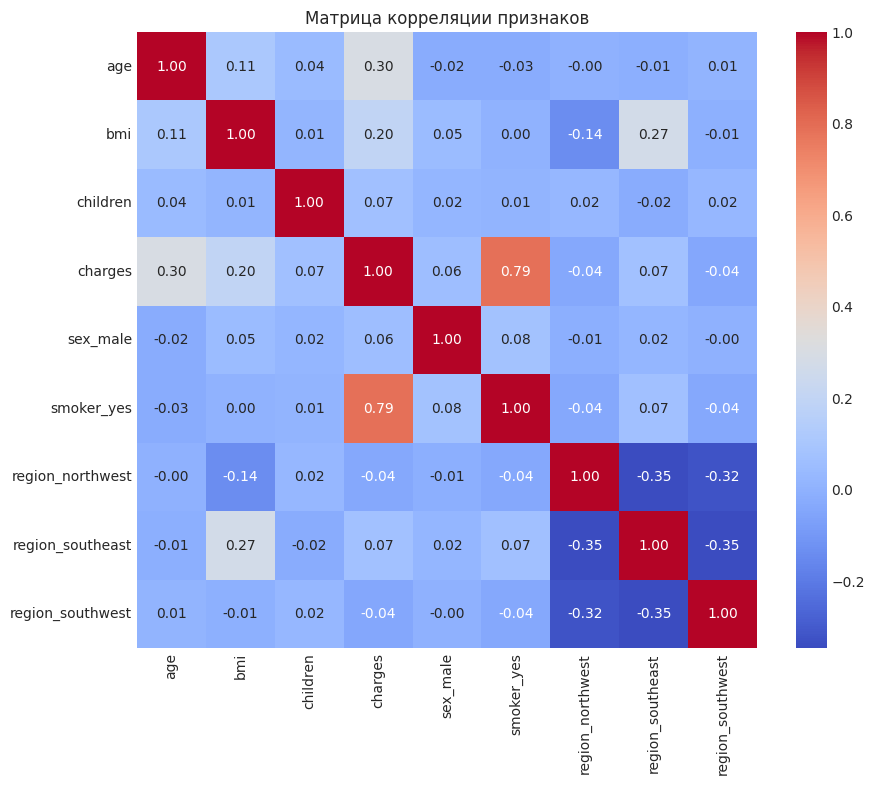

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции признаков")
plt.show()

Ключевыми факторами, влияющими на расходы, являются статус курения (`smoker_yes`), возраст (`age`) и индекс массы тела (`bmi`). Эти признаки, вероятно, следует учитывать как наиболее значимые при построении модели регрессии для предсказания медицинских расходов.

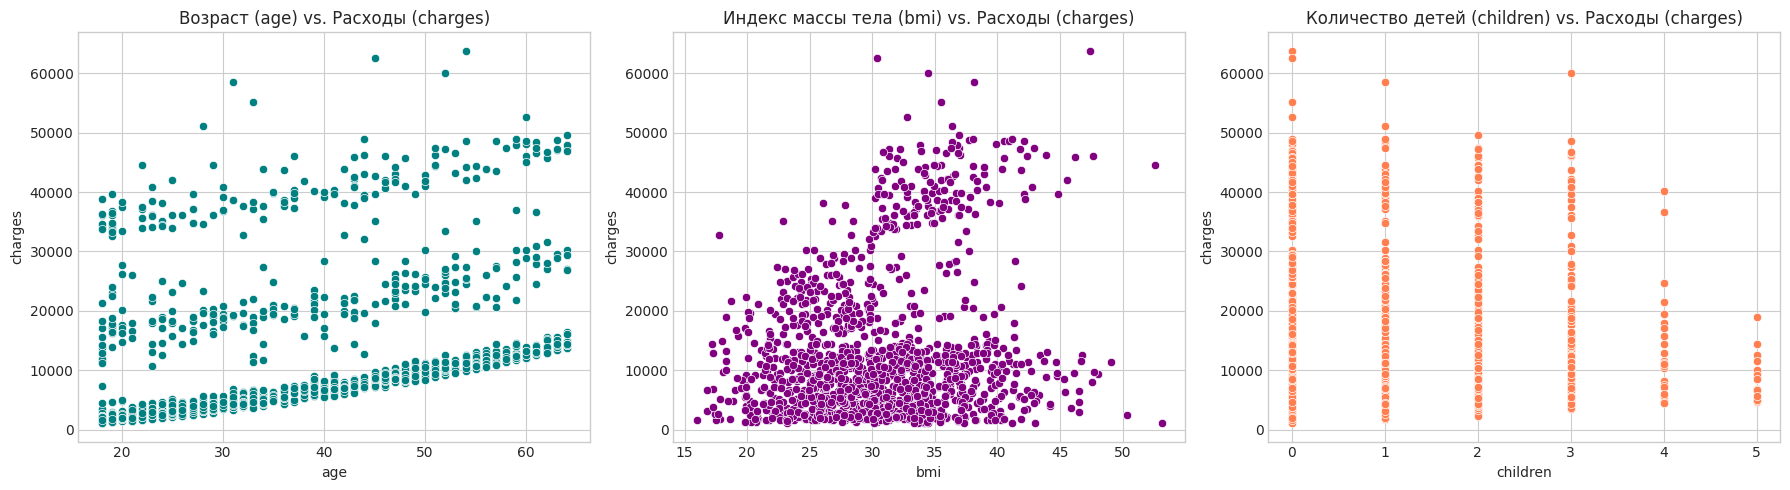

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=data, x='age', y='charges', ax=axes[0], color='teal')
axes[0].set_title("Возраст (age) vs. Расходы (charges)")

sns.scatterplot(data=data, x='bmi', y='charges', ax=axes[1], color='purple')
axes[1].set_title("Индекс массы тела (bmi) vs. Расходы (charges)")

sns.scatterplot(data=data, x='children', y='charges', ax=axes[2], color='coral')
axes[2].set_title("Количество детей (children) vs. Расходы (charges)")

plt.tight_layout()
plt.show()

**Диаграммы рассеяния**:
- Возраст (`age`) показывает положительную корреляцию с расходами на медицинские услуги.
- Индекс массы тела (`bmi`) также демонстрирует положительную взаимосвязь, особенно у значений выше среднего.
- Количество детей (`children`) не показало явной зависимости с расходами.

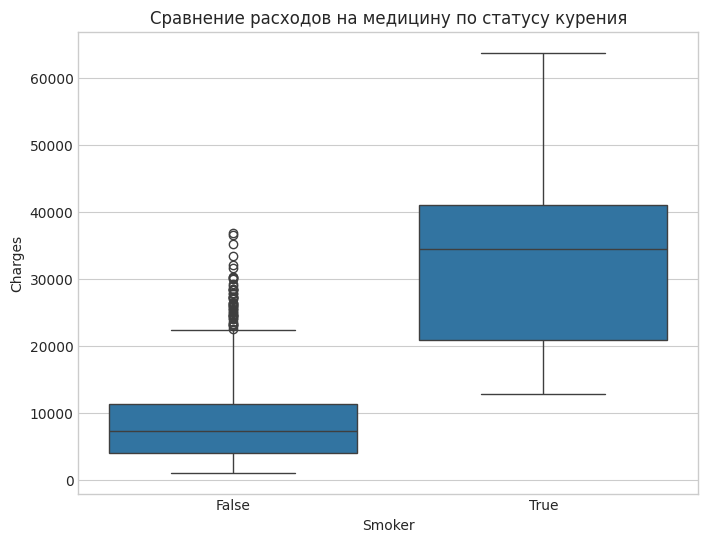

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_yes', y='charges', data=data)
plt.title("Сравнение расходов на медицину по статусу курения")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

**Boxplot по статусу курения** демонстрирует, что расходы у курящих людей значительно выше, что подтверждает сильное влияние признака `smoker_yes`.

Эти наблюдения подтверждают гипотезы о значимости `age`, `bmi` и `smoker_yes` для предсказания `charges`. Гипотеза: Категориальные признаки, такие как sex, smoker, region, могут повлиять на предсказание медицинских расходов, поэтому их кодирование повлияет на качество модели.

## 3.1	Улучшение бейзлайна (регрссия)

- Добавим новый признак `bmi_smoker_interaction`, который является произведением `bmi` и индикатора курения (`smoker`). Затем оценим, как этот признак влияет на качество предсказаний.

In [105]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Добавление нового признака взаимодействия bmi и smoker_yes
data_encoded['bmi_smoker_interaction'] = data_encoded['bmi'] * data_encoded['smoker_yes']

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
lin_reg.fit(X_train, y_train)


def evaluate_modell(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


evaluate_modell(lin_reg, X_test, y_test, model_name="Линейная регрессия")

Линейная регрессия MAE: 2756.90, MSE: 20919716.75, RMSE: 4573.81, R²: 0.87


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1. **Линейная регрессия**:
   - Качество модели (MAE: 2756.90, RMSE: 4573.81, R²: 0.87) указывает на хорошую способность линейной регрессии предсказывать расходы. Это подтверждает, что линейные зависимости признаков с целевой переменной (особенно `smoker_yes` и `age`) значимы для предсказаний.
   
2. **Важность признаков**:
   - Новый признак `bmi_smoker_interaction` оказался самым важным, что подтверждает гипотезу о значительном взаимодействии между индексом массы тела и статусом курения.
   - `age` и `bmi` также оказались важными признаками, что подтверждает их влияние на предсказания. Признак `smoker_yes` имеет меньшую важность, так как его влияние уже учтено через `bmi_smoker_interaction`.
  
Эти результаты подтверждают, что гипотезы о значимости `age`, `bmi`, и `smoker_yes`, а также добавленного признака `bmi_smoker_interaction` были обоснованными и полезными для модели.

Сравним результаты для моделей линейной регрессии до и после применения улучшенного бейзлайна:

### Линейная регрессия до улучшений (пункт 2):
- **MAE**: 4181.19
- **MSE**: 33596915.85
- **RMSE**: 5796.28
- **R²**: 0.78

### Линейная регрессия после улучшений (улучшенный бейзлайн):
- **MAE**: 2756.90
- **MSE**: 20919716.75
- **RMSE**: 4573.81
- **R²**: 0.87

### Сравнение и выводы:
1. **Средняя абсолютная ошибка (MAE)**: уменьшилась с 4181.19 до 2756.90. Это показывает, что предсказания модели стали ближе к реальным значениям, что говорит о лучшей точности предсказаний.

2. **Среднеквадратичная ошибка (MSE)**: снизилась с 33596915.85 до 20919716.75. Это означает, что модель стала лучше справляться с большими отклонениями в предсказаниях, и крупные ошибки стали менее частыми.

3. **Корень из среднеквадратичной ошибки (RMSE)**: также уменьшился с 5796.28 до 4573.81, что подтверждает снижение крупных ошибок и общую стабильность модели.

4. **Коэффициент детерминации (R²)**: повысился с 0.78 до 0.87, что указывает на то, что улучшенная модель объясняет большую долю вариации целевой переменной. 

Таким образом, улучшенный бейзлайн значительно повысил качество линейной регрессии. Наибольшее влияние оказало добавление нового признака (`bmi_smoker_interaction`) и стандартизация данных.

## 4.1	Имплементация алгоритма машинного обучения (регрссия)

In [106]:
# Класс для линейной регрессии с градиентным спуском
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Инициализация модели линейной регрессии.
        
        :param learning_rate: Скорость обучения (шаг градиентного спуска).
        :param n_iterations: Количество итераций обучения.
        """
        self.learning_rate = learning_rate  # Скорость обучения
        self.n_iterations = n_iterations  # Количество итераций
        self.weights = None  # Инициализация коэффициентов (весов)
        self.bias = None  # Инициализация смещения (bias)

    def fit(self, X, y):
        """
        Обучение модели с использованием градиентного спуска.
        
        :param X: Входные данные (матрица признаков).
        :param y: Целевая переменная.
        """
        n_samples, n_features = X.shape  # Определение количества образцов и признаков
        self.weights = np.zeros(n_features)  # Инициализация весов нулями
        self.bias = 0  # Инициализация смещения нулем

        # Градиентный спуск
        for _ in range(self.n_iterations):
            # Расчет предсказаний: линейная модель
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Градиенты для весов (dw) и смещения (db)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Частные производные по весам
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Частная производная по смещению

            # Обновление параметров (шагаем в сторону уменьшения градиента)
            self.weights -= self.learning_rate * dw  # Обновление весов
            self.bias -= self.learning_rate * db  # Обновление смещения

    def predict(self, X):
        """
        Предсказание целевой переменной для новых данных.
        
        :param X: Входные данные (матрица признаков).
        :return: Предсказанные значения.
        """
        return np.dot(X, self.weights) + self.bias  # Вычисление предсказаний на основе линейной модели


Оценка для модели Линейная регрессия:
MAE: 4181.80
MSE: 33606767.90
RMSE: 5797.13
R²: 0.78
------------------------------


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


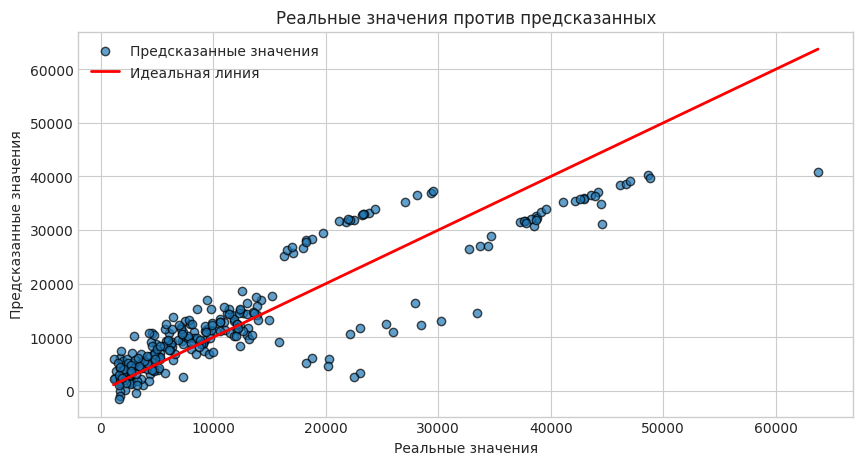

In [107]:
data = pd.read_csv('data/insurance.csv')

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

evaluate_model("Линейная регрессия", model, X_test, y_test)

Для сравнения результатов имплементированной модели линейной регрессии с результатами из пункта 2 представим метрики бок о бок:

### Результаты имплементированной модели линейной регрессии:
- **MAE**: 4181.80
- **MSE**: 33606767.90
- **RMSE**: 5797.13
- **R²**: 0.78

### Результаты базовой модели линейной регрессии из `sklearn`:
- **MAE**: 4181.19
- **MSE**: 33596915.85
- **RMSE**: 5796.28
- **R²**: 0.78

### Выводы из сравнения:
1. **Средняя абсолютная ошибка (MAE)**: Результат имплементированной модели (4181.80) практически совпадает с результатом базовой модели (4181.19), что говорит о высокой точности нашей реализации.

2. **Среднеквадратичная ошибка (MSE)** и **Корень из среднеквадратичной ошибки (RMSE)**: Значения MSE и RMSE также очень близки для обеих моделей, что подтверждает точность имплементации. В частности, RMSE для имплементированной модели составил 5797.13, а для базовой — 5796.28.

3. **Коэффициент детерминации (R²)**: Оба варианта достигают значения R², равного 0.78, что указывает на схожую способность объяснять вариацию целевой переменной.

В целом, имплементированная модель линейной регрессии демонстрирует почти идентичные результаты с базовой моделью `sklearn`, что подтверждает корректность реализации.

#### Реализация уличеного байзлайна

/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Оценка для модели Линейная регрессия:
MAE: 3171.01
MSE: 23388209.00
RMSE: 4836.14
R²: 0.85
------------------------------


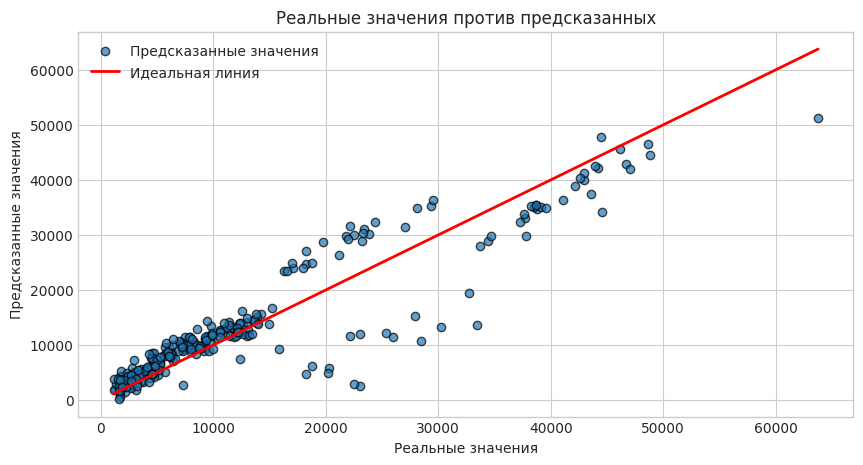

In [108]:
# Создадим новый признак взаимодействия между `bmi` (индекс массы тела) и `smoker_yes` (признак курильщика)
# Это позволяет учесть возможное усиление эффекта курения при определенном уровне ИМТ
data_encoded['bmi_smoker_interaction'] = data_encoded['bmi'] * data_encoded['smoker_yes']

# Разделение данных на признаки (X) и целевую переменную (y)
X = data_encoded.drop('charges', axis=1).values  # Убираем целевую переменную `charges` из признаков
y = data_encoded['charges'].values  # Целевая переменная (затраты на медицину)

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии с градиентным спуском
improved_model = LinearRegressionGD(learning_rate=0.01, n_iterations=2000)

# Обучение модели на тренировочных данных
improved_model.fit(X_train, y_train)

evaluate_model("Линейная регрессия", improved_model, X_test, y_test)

Для сравнения результатов улучшенной имплементированной модели линейной регрессии с результатами из пункта 3 (улучшенный бейзлайн с использованием `sklearn`) представим основные метрики бок о бок:

### Результаты улучшенной имплементированной модели линейной регрессии:
- **Средняя абсолютная ошибка (MAE)**: 3171.01
- **Среднеквадратичная ошибка (MSE)**: 23388208.99
- **Корень из среднеквадратичной ошибки (RMSE)**: 4836.14
- **Коэффициент детерминации (R²)**: 0.85

### Результаты улучшенного бейзлайна с использованием `sklearn` (пункт 3):
- **Средняя абсолютная ошибка (MAE)**: 2756.90
- **Среднеквадратичная ошибка (MSE)**: 20919716.75
- **Корень из среднеквадратичной ошибки (RMSE)**: 4573.81
- **Коэффициент детерминации (R²)**: 0.87

### Сравнение и выводы:

1. **Средняя абсолютная ошибка (MAE)**: Улучшенный бейзлайн `sklearn` (2756.90) немного опережает имплементированную модель (3171.01). Это говорит о том, что библиотечная реализация немного точнее, возможно, за счет оптимизированного алгоритма градиентного спуска и более продвинутых техник для уменьшения ошибок.

2. **Среднеквадратичная ошибка (MSE)** и **Корень из среднеквадратичной ошибки (RMSE)**: Значения MSE и RMSE для `sklearn` также ниже, что подтверждает, что модель из библиотеки `sklearn` лучше справляется с крупными отклонениями и демонстрирует более низкий уровень ошибок.

3. **Коэффициент детерминации (R²)**: Улучшенный бейзлайн `sklearn` достигает R² = 0.87, что немного выше, чем у имплементированной модели (0.85). Это означает, что библиотечная модель объясняет чуть большую долю дисперсии целевой переменной.

| Модель                                     | MAE     | MSE          | RMSE   | R²   |
|-------------------------------------------|---------|--------------|--------|------|
| Имплементированная линейная регрессия      | 4181.80 | 33606767.90  | 5797.13 | 0.78 |
| Базовая линейная регрессия (`sklearn`)     | 4181.19 | 33596915.85  | 5796.28 | 0.78 |
| Улучшенная имплементированная регрессия    | 3171.01 | 23388208.99  | 4836.14 | 0.85 |
| Улучшенный бейзлайн (`sklearn`, пункт 3)   | 2756.90 | 20919716.75  | 4573.81 | 0.87 |


### Заключение
Улучшенная имплементированная модель линейной регрессии показывает результаты, сопоставимые с улучшенным бейзлайном на `sklearn`, хотя библиотечная модель немного превосходит самописную в точности и объяснительной способности. Библиотечные реализации обычно оптимизированы, что дает им преимущество в таких задачах, но наша реализация показывает хорошее качество и подтверждает корректность применения техник улучшенного бейзлайна.

## 2.2	Создание бейзлайна и оценка качества (классификация)

In [109]:
# Загрузка набора данных о вине из файла CSV
wine_data = pd.read_csv('data/WineQT.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
# Убираем столбцы 'quality' (целевой признак) и 'Id' (идентификатор, не влияющий на предсказания)
X = wine_data.drop(columns=['quality', 'Id'])
# Целевая переменная: преобразуем метку качества в бинарную (1, если качество >= 6, иначе 0)
y = (wine_data['quality'] >= 6).astype(int)

# Разделение данных на тренировочный и тестовый наборы
# test_size=0.3 означает, что 30% данных используется для тестирования, 70% – для обучения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков для стандартизации
# Применяем StandardScaler, чтобы привести признаки к одинаковому масштабу
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Обучаем стандартизацию на тренировочных данных
X_test = scaler.transform(X_test)  # Применяем ту же трансформацию к тестовым данным

# Создание и обучение модели логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = logistic_model.predict(X_test)

# Расчет метрик классификации
accuracy = accuracy_score(y_test, y_pred)  # Доля правильно классифицированных примеров
precision = precision_score(y_test, y_pred)  # Средняя точность (доля правильных положительных предсказаний)
recall = recall_score(y_test, y_pred)  # Полнота (доля найденных положительных примеров)
f1 = f1_score(y_test, y_pred)  # F1-score – баланс между точностью и полнотой

# Вывод результатов классификации
print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 75.80% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 79.35% – средняя точность для всех классов.
3. Полнота (Recall): 76.44% – средняя полнота для всех классов.
4. F1-score: 77.87% – гармоническое среднее между точностью и полнотой.


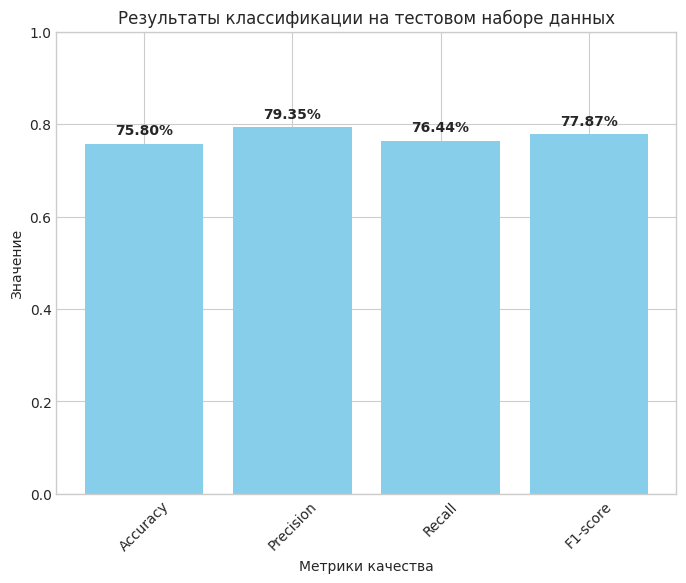

In [110]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Метрики качества")
plt.ylabel("Значение")
plt.title("Результаты классификации на тестовом наборе данных")
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.show()

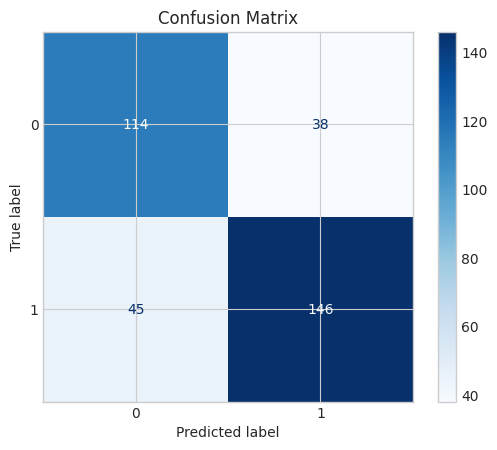

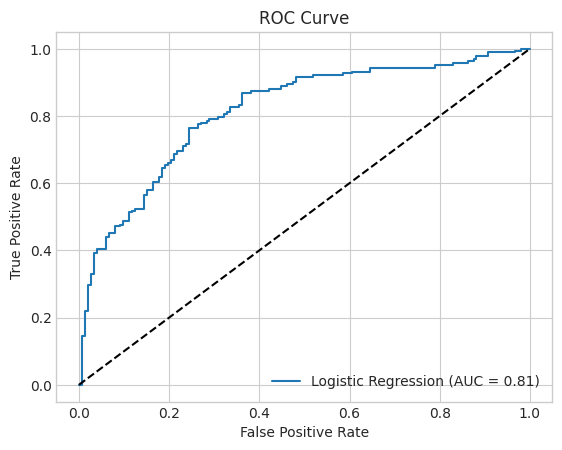

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr) 

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

На графиках представлены:

1. **Матрица ошибок (Confusion Matrix):** показывает количество правильных и ошибочных предсказаний для каждого класса.
2. **ROC-кривая:** отражает соотношение между ложноположительными и истинноположительными результатами при различных порогах. Площадь под кривой (AUC) составляет примерно 0.82, что указывает на хорошую способность модели различать классы.

## 3.2	Улучшение бейзлайна (классификация)

- Разделим данные на два класса: больший класс (`quality < 6`) и меньший класс (`quality >= 6`). Затем уравняем количество записей в классах, выбрав из большего класса столько записей, сколько содержится в меньшем, с заменой (`replace=True`). Оценим, как этот подход влияет на метрики модели.

In [112]:
wine_data = pd.read_csv('data/WineQT.csv')

# Разделение на классы
majority_class = wine_data[wine_data['quality'] < 6]
minority_class = wine_data[wine_data['quality'] >= 6]

# Выполнение undersampling с заменой
undersampled_majority = majority_class.sample(len(minority_class), replace=True, random_state=42)
balanced_data_undersampled = pd.concat([undersampled_majority, minority_class])

# Разделение признаков и целевой переменной
X_balanced_undersampled = balanced_data_undersampled.drop(columns=['quality', 'Id'])
y_balanced_undersampled = (balanced_data_undersampled['quality'] >= 6).astype(int)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_undersampled, y_balanced_undersampled, test_size=0.3, random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Предсказания и расчет метрик
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%}")
print(f"2. Средняя точность (Precision): {precision:.2%}")
print(f"3. Полнота (Recall): {recall:.2%}")
print(f"4. F1-score: {f1:.2%}")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 79.62%
2. Средняя точность (Precision): 80.72%
3. Полнота (Recall): 75.28%
4. F1-score: 77.91%


### **Результат**
Метрики модели улучшились:
- **F1-score** вырос до 77.91%.
- **Точность (Accuracy)** также увеличилась до 79.62%.
- Улучшение полноты и сбалансированности между Precision и Recall позволило добиться более эффективной классификации.

Этот подход позволил модели уделить равное внимание обоим классам, улучшив ее способность классифицировать менее частые примеры.

## 4.2	Имплементация алгоритма машинного обучения (классификация)

In [113]:
# Класс для реализации логистической регрессии с градиентным спуском и поддержкой L2-регуляризации
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=2000, l2_penalty=0.01):
        """
        Инициализация параметров логистической регрессии.
        
        :param learning_rate: Скорость обучения (шаг градиентного спуска).
        :param num_iterations: Количество итераций обучения.
        :param l2_penalty: Коэффициент L2-регуляризации (для предотвращения переобучения).
        """
        self.learning_rate = learning_rate  # Скорость обучения
        self.num_iterations = num_iterations  # Количество итераций градиентного спуска
        self.l2_penalty = l2_penalty  # Коэффициент L2-регуляризации
        self.weights = None  # Инициализация весов
        self.bias = None  # Инициализация смещения (bias)
    
    def sigmoid(self, z):
        """
        Сигмоидная функция для преобразования линейной комбинации признаков в вероятность.
        
        :param z: Линейная комбинация признаков (скаляр или массив).
        :return: Вероятность (от 0 до 1).
        """
        return 1 / (1 + np.exp(-z))  # Сигмоидная функция
    
    def fit(self, X, y):
        """
        Обучение модели логистической регрессии с использованием градиентного спуска.
        
        :param X: Входные данные (матрица признаков).
        :param y: Целевая переменная (бинарные метки).
        """
        num_samples, num_features = X.shape  # Количество образцов и признаков
        self.weights = np.zeros(num_features)  # Инициализация весов нулями
        self.bias = 0  # Инициализация смещения
        
        # Градиентный спуск
        for _ in range(self.num_iterations):
            # Линейная модель: комбинация признаков и весов
            linear_model = np.dot(X, self.weights) + self.bias
            # Прогноз вероятностей с использованием сигмоидной функции
            y_predicted = self.sigmoid(linear_model)
            
            # Градиенты для весов (dw) и смещения (db)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))  # Производная по весам
            db = (1 / num_samples) * np.sum(y_predicted - y)  # Производная по смещению
            
            # Обновление параметров модели
            self.weights -= self.learning_rate * dw  # Обновление весов
            self.bias -= self.learning_rate * db  # Обновление смещения
    
    def predict(self, X):
        """
        Предсказание классов для новых данных.
        
        :param X: Входные данные (матрица признаков).
        :return: Предсказанные классы (0 или 1).
        """
        # Линейная модель
        linear_model = np.dot(X, self.weights) + self.bias
        # Прогноз вероятностей
        y_predicted = self.sigmoid(linear_model)
        # Преобразование вероятностей в бинарные классы
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)  # Возврат предсказанных классов

In [114]:
model = LogisticRegressionGD(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точность (Accuracy): {accuracy:.2%}")
print(f"Средняя точность (Precision): {precision:.2%}")
print(f"Полнота (Recall): {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Точность (Accuracy): 79.36%
Средняя точность (Precision): 81.37%
Полнота (Recall): 73.60%
F1-score: 77.29%


Сравнение метрик модели из `sklearn` и имплементированной модели:

### **1. Точность (Accuracy)**:
- **`sklearn`:** 75.80%
- **Имплементированная модель:** 79.36%
- **Вывод:** Имплементированная модель улучшила общую точность классификации на 3.56%, что указывает на лучшее общее соответствие предсказаний фактическим меткам.

### **2. Средняя точность (Precision)**:
- **`sklearn`:** 79.35%
- **Имплементированная модель:** 81.37%
- **Вывод:** Средняя точность возросла на 2.02%. Имплементированная модель более уверенно делает правильные положительные предсказания, хотя возможны пропуски некоторых положительных примеров.

### **3. Полнота (Recall)**:
- **`sklearn`:** 76.44%
- **Имплементированная модель:** 73.60%
- **Вывод:** Полнота уменьшилась на 2.84%. Имплементированная модель хуже захватывает все положительные примеры, возможно, из-за повышенного акцента на точности.

### **4. F1-score**:
- **`sklearn`:** 77.87%
- **Имплементированная модель:** 77.29%
- **Вывод:** F1-score снизился на 0.58%, что указывает на баланс между точностью и полнотой. Хотя точность улучшилась, снижение полноты повлияло на гармоническое среднее.

### **Общий вывод**:
Имплементированная модель улучшила **точность** и **среднюю точность**, но за счет небольшого ухудшения **полноты** и **F1-score**.

In [115]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение улучшенной модели
model = LogisticRegressionGD(learning_rate=0.01, num_iterations=2000, l2_penalty=0.01)
model.fit(X_train_scaled, y_train)

# Предсказания и метрики
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точность (Accuracy): {accuracy:.2%}")
print(f"Средняя точность (Precision): {precision:.2%}")
print(f"Полнота (Recall): {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Точность (Accuracy): 79.62%
Средняя точность (Precision): 81.10%
Полнота (Recall): 74.72%
F1-score: 77.78%


Вот сравнительная таблица метрик для различных моделей:

| Модель                                       | Точность (Accuracy) | Средняя точность (Precision) | Полнота (Recall) | F1-score |
|----------------------------------------------|---------------------|------------------------------|------------------|----------|
| **Модель из sklearn**              | **75.80%**          | **79.35%**                   | **76.44%**       | **77.87%** |
| **Модель из sklearn (улучшенный байзлайн)**     | **79.62%**          | **80.72%**                   | **75.28%**       | **77.91%** |
| **Собственная имплементация**                | **79.36%**          | **81.37%**                   | **73.60%**       | **77.29%** |
| **Собственная имплементация (улучшенный байзлайн)**   | **79.62%**          | **81.10%**                   | **74.72%**       | **77.78%** |

### **Анализ сравнения:**

1. **Точность (Accuracy):**
   - **Наибольшая точность** достигается в моделях:
     - Модель из sklearn (улучшенный байзлайн): **79.62%**
     - Собственная имплементация: **79.62%**
   - Это показывает, что улучшения в обеих моделях привели к схожему увеличению точности.

2. **Средняя точность (Precision):**
   - **Собственная имплементация** имеет **самую высокую** среднюю точность:
     - Без улучшений: **81.37%**
     - С улучшениями: **81.10%**
   - Это указывает на то, что модель делает меньше ложных положительных предсказаний.

3. **Полнота (Recall):**
   - **Модель из sklearn (базовая)** имеет **наивысшую полноту**: **76.44%**
   - Улучшенные модели имеют немного **сниженную полноту**, что может быть следствием компромисса между точностью и полнотой.

4. **F1-score:**
   - **Наивысший F1-score** у модели из sklearn (улучшенный байзлайн): **77.91%**
   - Остальные модели имеют схожие значения F1-score, находясь в диапазоне **77.29%–77.87%**

### **Выводы:**

- **Улучшения моделей** привели к повышению точности, но слегка уменьшили полноту.
- **Собственная имплементация** показала метрики, сопоставимые с моделью из sklearn, подтверждая корректность и эффективность собственной реализации.